In [1]:
%matplotlib inline
import os
import os.path as osp
import pandas as pd
import numpy as np
from tcre.env import *
import itertools
import glob
import json 
import plotnine as pn
import matplotlib.pyplot as plt

In [47]:
output_dir = osp.join(RESULTS_DATA_DIR, 'label-modeling-v3')

dirs = [f.split('/')[-2] for f in glob.glob(output_dir + '/*/history.json')]
parts = []
for d in dirs:
    with open(osp.join(output_dir, d, 'history.json'), 'r') as f:
        history = json.load(f)
    with open(osp.join(output_dir, d, 'config.json'), 'r') as f:
        config = json.load(f)
    parts.append((d, pd.Series(config), pd.DataFrame(history)))
len(parts)

385

In [48]:
parts[0][1].apply(np.isscalar)

relation_class         True
entity_types          False
marker_list            True
use_secondary          True
use_swaps              True
use_lower              True
wrd_embedding_type     True
model_size             True
weight_decay           True
learning_rate          True
vocab_limit            True
device                 True
label                  True
markers               False
swaps                 False
model_args            False
dtype: bool

In [49]:
parts[0][2].head()

,accuracy,ct,epoch,f1,loss,lr,precision,recall,type
0,0.783972,287,1,0.03125,0.698306,0.005,0.25,0.016667,Training
1,0.788618,123,1,0.00000,0.693147,0.005,0.00,0.000000,Validation
2,0.790941,287,2,0.00000,0.693147,0.005,0.00,0.000000,Training
3,0.788618,123,2,0.00000,0.693147,0.005,0.00,0.000000,Validation
4,0.790941,287,3,0.00000,0.693147,0.005,0.00,0.000000,Training


In [50]:
df = []
for p in parts:
    config_id = int(p[0].split('_')[-1])
    config = p[1]
    history = p[2]
    props = config[config.apply(np.isscalar)].to_dict()
    history = history.assign(**props).assign(config_id=config_id)
    df.append(history)
df = pd.concat(df)
df.head()

,accuracy,ct,epoch,f1,loss,lr,precision,recall,type,relation_class,...,use_swaps,use_lower,wrd_embedding_type,model_size,weight_decay,learning_rate,vocab_limit,device,label,config_id
0,0.783972,287,1,0.03125,0.698306,0.005,0.25,0.016667,Training,inducing_transcription_factor,...,False,False,denovo,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,119
1,0.788618,123,1,0.00000,0.693147,0.005,0.00,0.000000,Validation,inducing_transcription_factor,...,False,False,denovo,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,119
2,0.790941,287,2,0.00000,0.693147,0.005,0.00,0.000000,Training,inducing_transcription_factor,...,False,False,denovo,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,119
3,0.788618,123,2,0.00000,0.693147,0.005,0.00,0.000000,Validation,inducing_transcription_factor,...,False,False,denovo,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,119
4,0.790941,287,3,0.00000,0.693147,0.005,0.00,0.000000,Training,inducing_transcription_factor,...,False,False,denovo,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,119


In [51]:
# Assign numeric id for whatever it is that makes an experiment unique
df['exp_id'] = (df.groupby(['relation_class', 'config_id']).cumcount() == 0).astype(int).cumsum()
df['exp_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44698 entries, 0 to 69
Data columns (total 23 columns):
accuracy              44698 non-null float64
ct                    44698 non-null int64
epoch                 44698 non-null int64
f1                    44698 non-null float64
loss                  44698 non-null float64
lr                    44698 non-null float64
precision             44698 non-null float64
recall                44698 non-null float64
type                  44698 non-null object
relation_class        44698 non-null object
marker_list           44698 non-null object
use_secondary         44698 non-null bool
use_swaps             44698 non-null bool
use_lower             44698 non-null bool
wrd_embedding_type    44698 non-null object
model_size            44698 non-null object
weight_decay          44698 non-null float64
learning_rate         44698 non-null float64
vocab_limit           44698 non-null int64
device                44698 non-null object
label          

In [53]:
cols = ['type', 'exp_id']
dfp = (
    df.sort_values(cols + ['f1'], ascending=False).groupby(cols, group_keys=False).head(1)
    .pipe(lambda df: df[df['type'].isin(['Validation'])])
)
dfp.head()

,accuracy,ct,epoch,f1,loss,lr,precision,recall,type,relation_class,...,use_lower,wrd_embedding_type,model_size,weight_decay,learning_rate,vocab_limit,device,label,config_id,exp_id
19,0.796748,123,10,0.561404,0.719355,0.005000,0.516129,0.615385,Validation,inducing_transcription_factor,...,False,denovo,L,0.000,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,10,385
91,0.829268,123,46,0.588235,0.697235,0.001250,0.600000,0.576923,Validation,inducing_transcription_factor,...,False,denovo,S,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,9,384
29,0.739837,123,15,0.428571,0.746834,0.005000,0.400000,0.461538,Validation,inducing_transcription_factor,...,False,denovo,S,0.000,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,8,383
135,0.821138,123,68,0.541667,0.698371,0.000313,0.590909,0.500000,Validation,inducing_transcription_factor,...,False,w2v_trained,L,0.005,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,7,382
59,0.813008,123,30,0.530612,0.703412,0.001250,0.565217,0.500000,Validation,inducing_transcription_factor,...,False,w2v_trained,L,0.000,0.005,50000,cuda:1,relation_class=inducing_transcription_factor:m...,6,381


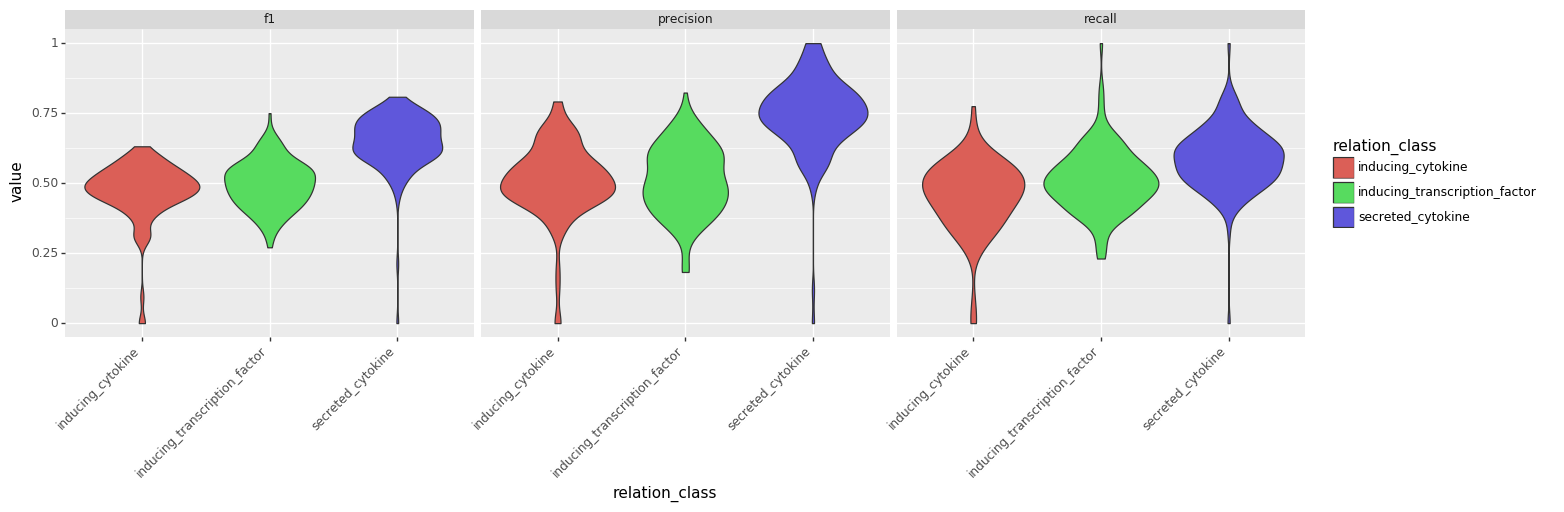

<ggplot: (-9223363305113613743)>

In [198]:
(
    pn.ggplot(
        dfp.set_index('relation_class')[['precision', 'recall', 'f1']].rename_axis('metric', axis=1).stack().rename('value').reset_index(),
        pn.aes(x='relation_class', y='value', fill='relation_class')
    ) + 
    pn.facet_wrap('~metric') + 
    pn.geom_violin() + 
    pn.theme(figure_size=(16, 4), axis_text_x=pn.element_text(rotation=45, hjust=1))
)

In [176]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, message='The default of the `iid` parameter.*')
features = ['marker_list', 'use_secondary', 'use_swaps', 'use_lower', 'wrd_embedding_type', 'model_size', 'weight_decay'] 

def get_coefs(est):
    coefs = []
    grps = dfp.groupby(['relation_class'])
    fig, axs = plt.subplots(1, len(grps))
    fig.set_size_inches(12, 4)
    for i, (k, g) in enumerate(grps):
        X = pd.get_dummies(g[features].astype(str))
        y = g['f1'].values
        est = est.fit(X.values, y)
        y_pred = est.predict(X)
        pd.DataFrame({'y_true': y, 'y_pred': y_pred}).plot(kind='scatter', x='y_pred', y='y_true', ax=axs[i], title=k)
        coefs.append(pd.Series(est.coef_, index=X.columns.to_list()).sort_index().append(pd.Series(dict(rc=k))))
    return est, pd.DataFrame(coefs)

def plot_coefs(est, coefs):
    return (
        pn.ggplot(
            coefs
                .set_index('rc').rename_axis('metric', axis='columns').stack().rename('value').reset_index()
                .assign(metric=lambda df: pd.Categorical(df['metric'], ordered=True, categories=df.groupby('metric')['value'].mean().sort_values().index)), 
            pn.aes(x='metric', y='value', fill='rc', color='rc', group='rc')
        ) + 
        pn.geom_point() +
        pn.geom_line() + 
        pn.ggtitle(type(est).__name__) + 
        pn.theme(figure_size=(12, 4), axis_text_x=pn.element_text(rotation=90, hjust=.5))
    )

In [177]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

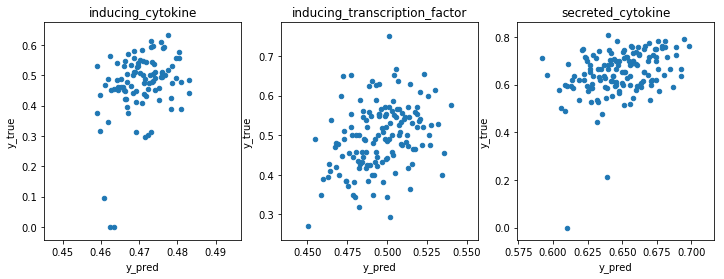

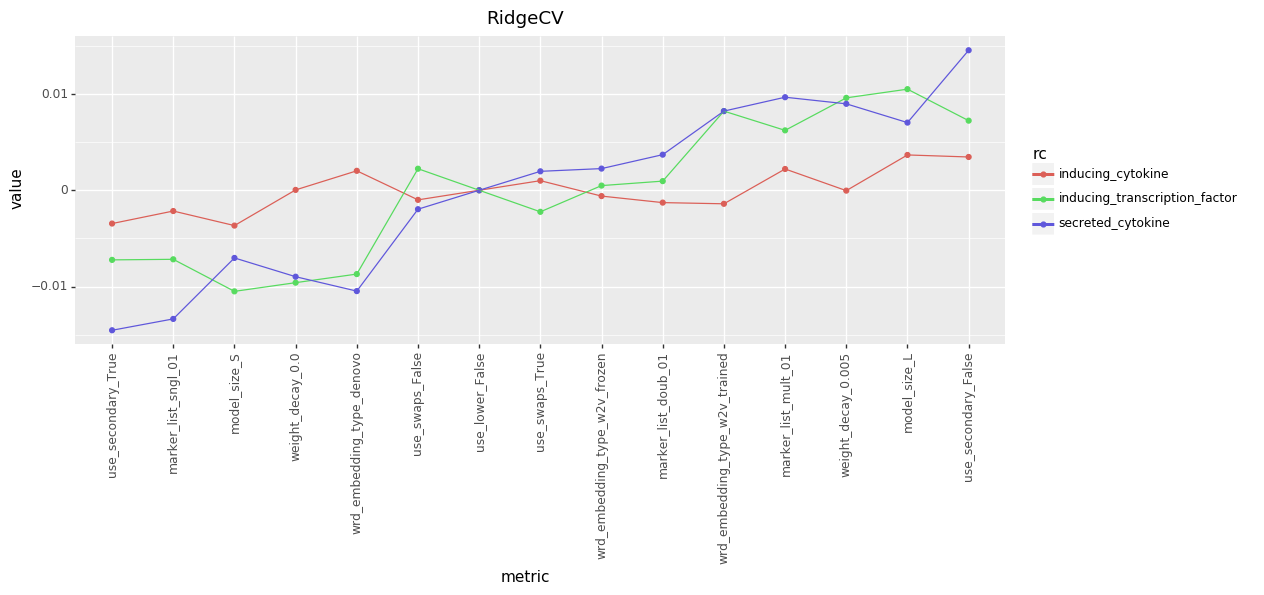

<ggplot: (-9223363305110170971)>

In [178]:
plot_coefs(*get_coefs(RidgeCV(normalize=True, cv=5)))

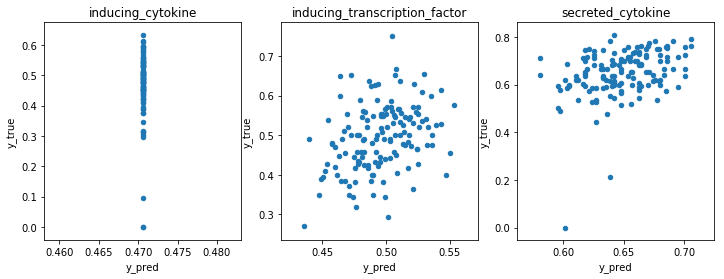

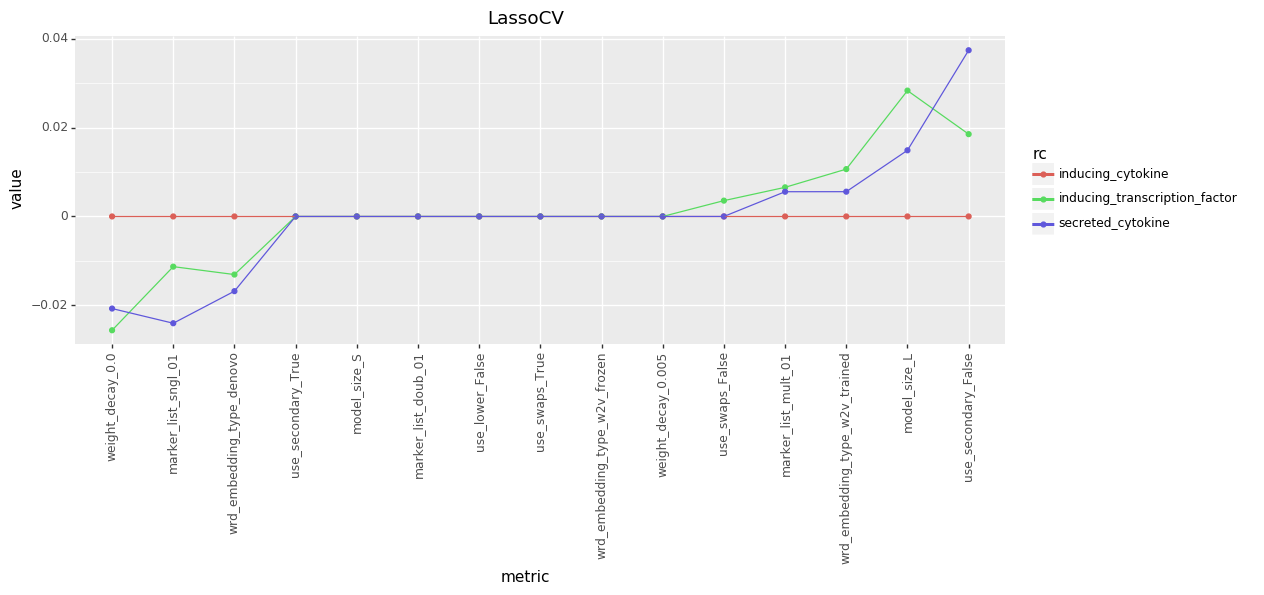

<ggplot: (8731743987183)>

In [179]:
plot_coefs(*get_coefs(LassoCV(normalize=True, cv=5, random_state=1)))

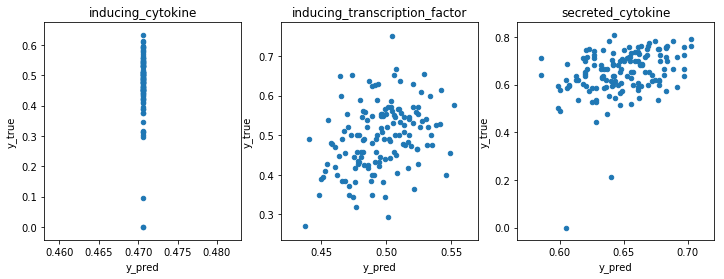

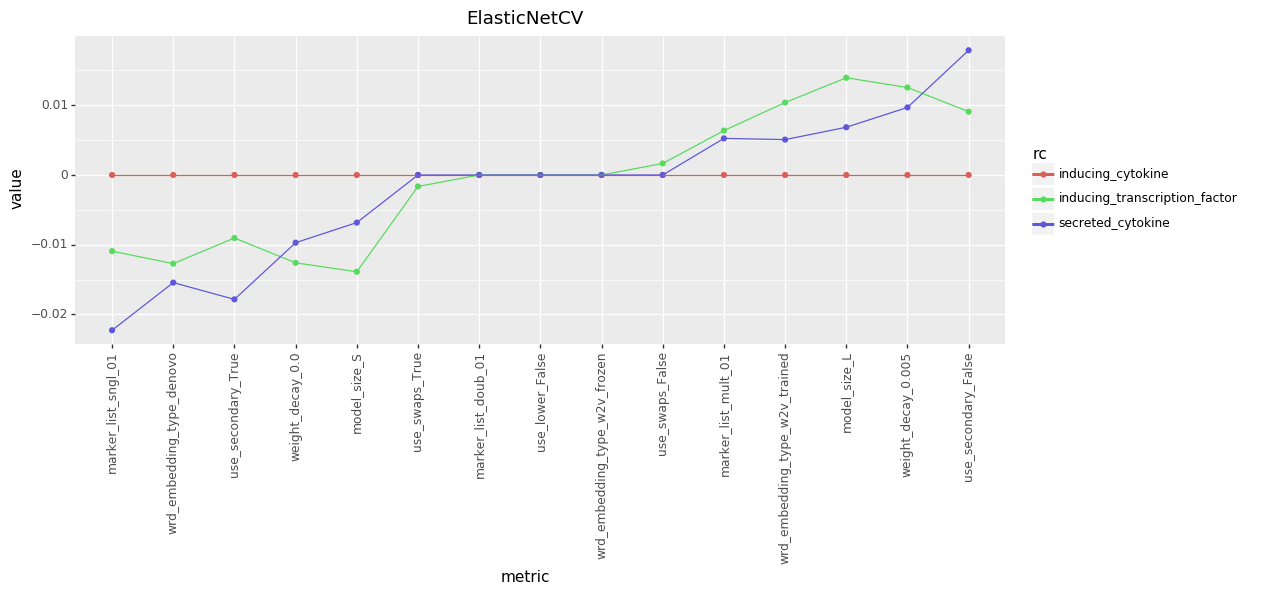

<ggplot: (-9223363305108513269)>

In [180]:
plot_coefs(*get_coefs(ElasticNetCV(normalize=True, cv=5, random_state=1)))

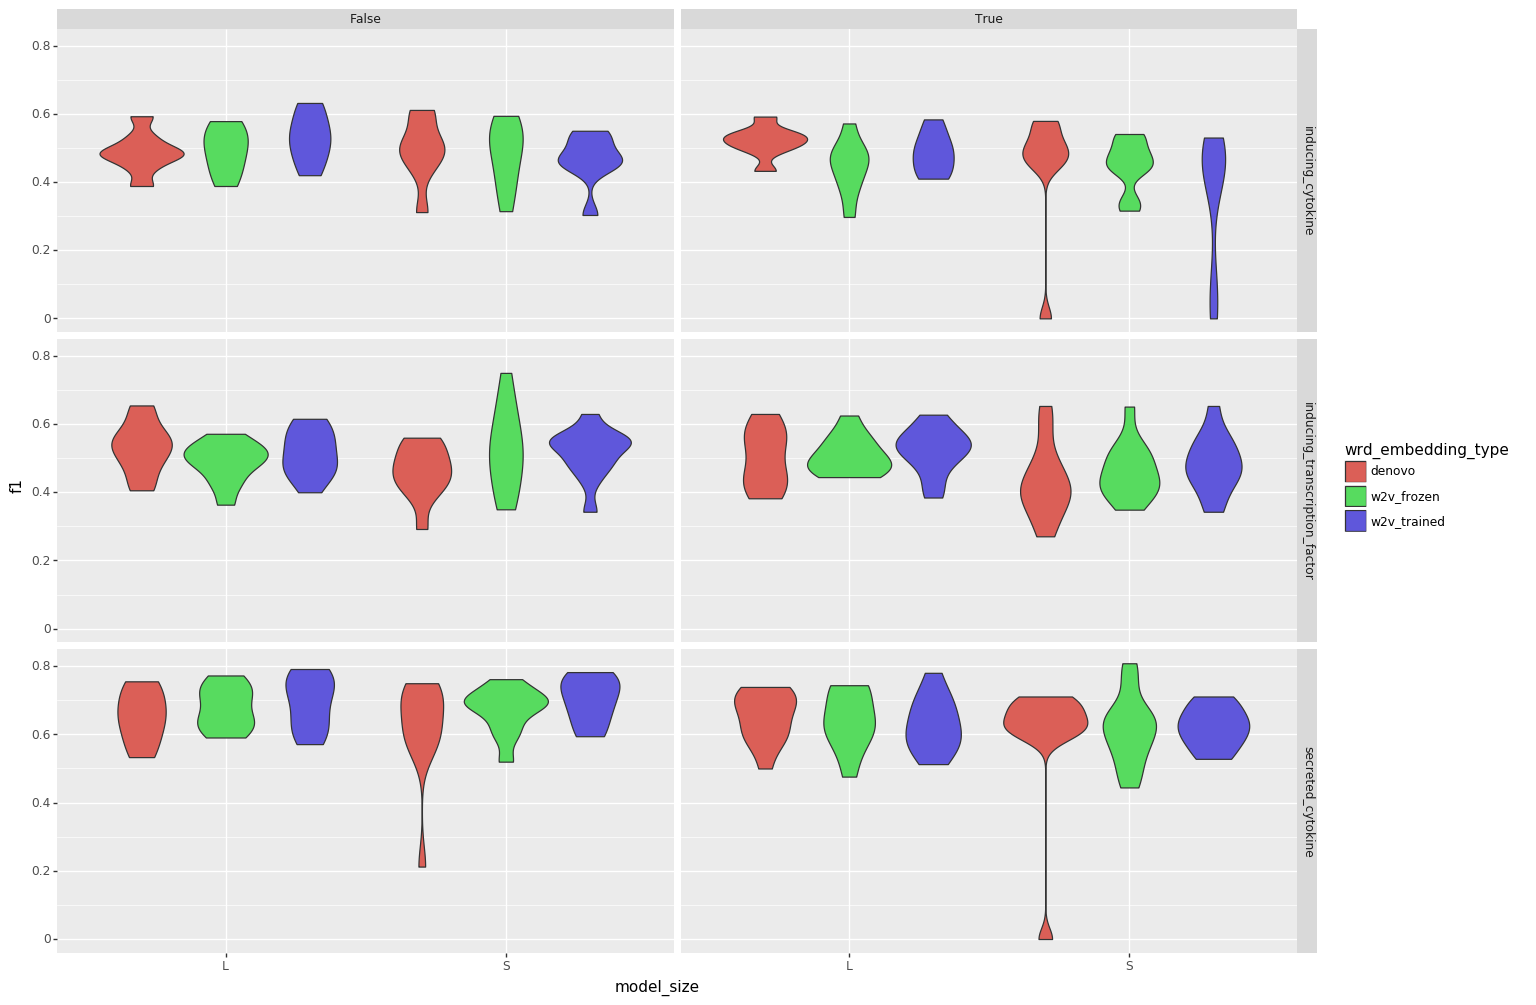

<ggplot: (-9223363305111758448)>

In [173]:
(
    pn.ggplot(
        dfp
            .assign(exp_id=lambda df: pd.Categorical(df['exp_id'].values, ordered=True, categories=df.sort_values('f1')['exp_id'].values[::-1]))
            .assign(weight_decay=lambda df: df['weight_decay'].astype(str))
        ,
        pn.aes(x='model_size', y='f1', fill='wrd_embedding_type')
    ) + 
    pn.geom_violin() + 
    pn.facet_grid('relation_class~use_secondary') + 
    pn.theme(figure_size=(16, 12))
)

In [190]:
# Expected F1 for given class distributions and a random prediction:
from sklearn.metrics import f1_score
res = []
for a in [.05, .1, .15, .2, .25, .3, .4, .5]:
    y_sim = np.random.choice([0, 1], size=1000000, p=[1-a, a])
    y_pre = np.random.choice([0, 1], size=1000000, p=[1-a, a])
    print(a, f1_score(y_pre, y_sim))

0.05 0.05076314527728943
0.1 0.098911849254248
0.15 0.15077381925423772
0.2 0.20044124489091447
0.25 0.24981482000504487
0.3 0.3004187270630527
0.4 0.4013084165741077
0.5 0.49966961794639303
